In [8]:
import numpy as np
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

# Problem 1

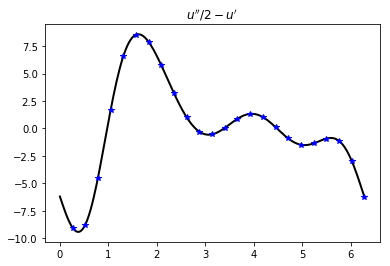

In [13]:
N=24
x1 = (2.*np.pi/N)*np.arange(1,N+1)
f = np.sin(x1)**2.*np.cos(x1) + np.exp(2.*np.sin(x1+1))

# This array is reordered in Python to
# accomodate the ordering inside the fft function in scipy.
k = np.concatenate(( np.arange(0,N/2) ,
    np.array([0]) , # Because hat{f}'(k) at k = N/2 is zero.
    np.arange(-N/2+1,0,1) ))

# Approximates the derivative using the pseudospectral method
f_hat = fft(f)
fp_hat = ((1j*k)*f_hat)
fp = np.real(ifft(fp_hat))

# Approximates the second derivative
f_2hat = fft(fp)
fp_2hat = ((1j*k)*f_2hat)
fp_2 = np.real(ifft(fp_2hat))

# Calculates the derivative analytically
x2 = np.linspace(0,2*np.pi,200)
derivative = 2*np.sin(x2)*np.cos(x2)**2-np.sin(x2)**3+2*np.cos(x2+1)*np.exp(2*np.sin(x2+1))
d2 = 2 * np.cos(x2)**3 - 2 * np.exp(2 * np.sin(x2 + 1)) * (np.sin(x2 + 1)- 2 * np.cos(x2+1)**2) - 7 * np.sin(x2)**2 * np.cos(x2)


plt.plot(x2,d2/2 - derivative,'-k',linewidth=2.)
plt.plot(x1,fp_2/2-fp,'*b')
plt.title("$u''/2-u'$")
plt.savefig('spectral2_derivative.pdf')
plt.show()

# Problem 2

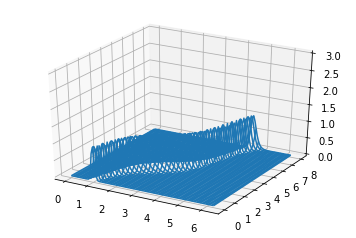

In [18]:
t_steps = 150 # Time steps
x_steps = 100 # x steps

'''
Your code here to set things up
'''
# Set up domains
x_domain = np.linspace(0,2 * np.pi, x_steps)
t_domain = np.linspace(0,8,t_steps)

# Find k just like above
N = x_steps
k = np.concatenate(( np.arange(0,N/2) ,
    np.array([0]) , # Because hat{f}'(k) at k = N/2 is zero.
    np.arange(-N/2+1,0,1) ))

# Calculate c(x) and initial condition u0
c = .2 + np.sin(x_domain-1)**2
u0 = np.exp(-100 * (x_domain-1)**2)

# Define u'(t) = f(u,t)
u_t = lambda u, t : -c * np.real(ifft(((1j*k)*fft(u))))

# RK4 method. Should return a t_steps by x_steps array
sol = odeint(u_t,u0,t_domain)

# Plot the solution
X,Y = np.meshgrid(x_domain, t_domain)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_wireframe(X,Y,sol)
ax.set_zlim(0,3)
plt.show()